# One-and-a-half-years Imputation

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import numpy as np
def load_results(area, methods):
    log_path = "../log_bak_2/imputation/{}".format(area)
    all_maes = []
    all_mses = []
    for method in methods:
        path = os.path.join(log_path, method)
        subdir = os.listdir(path)
        subdir = [x for x in subdir if x.endswith('.log') and "missing" in x]
        index = [int(x[-5]) for x in subdir]
        subdir = [subdir[i] for i in np.argsort(index)]
        mae = []
        mse = []
        for i in range(9):
            with open(os.path.join(path, subdir[i]), 'rb') as f:
                print(os.path.join(path, subdir[i]))
                lines = f.readlines()
                mae.append(float(lines[1][42:47]))
                mse.append(float(lines[1][-7:-1]))
        all_maes.append(mae)
        all_mses.append(mse)
    return np.array(all_maes), np.array(all_mses)

In [3]:
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=-0.1, fontsize=34)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    # color_palette = ["#A51C36", "#7ABBDB",  "#84BA42", "#682487", "#D4562E", "#4485C7","#DBB428", "#6F6F6F", "#4DB748"]
    color_palette = ["#FF0000", "#8C564B",  "#2CA02C", "#FFCC00", "#1F77B4", "#9467BD","#FF7F0E", "#E377C2", "#330000"]

    

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.05, color=color_palette[i % len(color_palette)])
        
    
    plt.xticks(theta[:-1], metrics, color="black", size=32)
    # plt.yscale("log")
    ax.set_yscale("log")
    a=np.max(data)
    b=np.min(data)
    c=10**((np.log10(a) + np.log10(b))/2)
    plt.yticks([a,c,b], color="black", size=24)
    

    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
    
    return fig

PRE

../log_bak_2/imputation/PRE/STIMP/20250428_180011_missing_0.1.log
../log_bak_2/imputation/PRE/STIMP/20250429_073100_missing_0.2.log
../log_bak_2/imputation/PRE/STIMP/20250428_055349_missing_0.3.log
../log_bak_2/imputation/PRE/STIMP/20250429_194650_missing_0.4.log
../log_bak_2/imputation/PRE/STIMP/20250430_071300_missing_0.5.log
../log_bak_2/imputation/PRE/STIMP/20250426_221355_missing_0.6.log
../log_bak_2/imputation/PRE/STIMP/20250427_115611_missing_0.7.log
../log_bak_2/imputation/PRE/STIMP/20250428_013223_missing_0.8.log
../log_bak_2/imputation/PRE/STIMP/20250428_151822_missing_0.9.log
../log_bak_2/imputation/PRE/DINEOF_per_timestep/20250430_201732_missing_0.1.log
../log_bak_2/imputation/PRE/DINEOF_per_timestep/20250430_201742_missing_0.2.log
../log_bak_2/imputation/PRE/DINEOF_per_timestep/20250430_201752_missing_0.3.log
../log_bak_2/imputation/PRE/DINEOF_per_timestep/20250430_201809_missing_0.4.log
../log_bak_2/imputation/PRE/DINEOF_per_timestep/20250430_201826_missing_0.5.log
../log

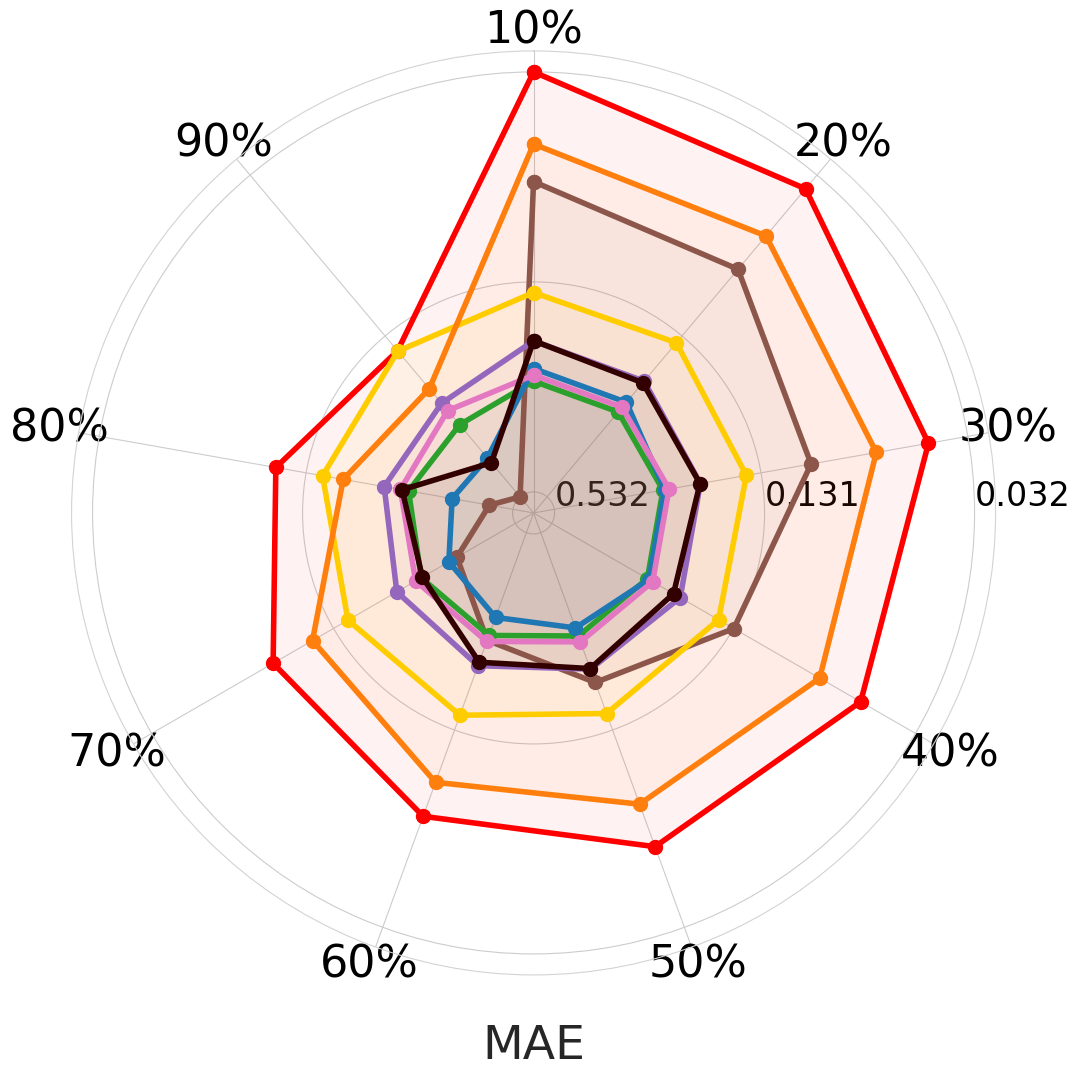

[0.51857355 0.50340136 0.54807692 0.62318841 0.68787384 0.71290323
 0.75685234 0.76431718 0.71922571]
[0.38167939 0.33636364 0.29734219 0.27031019 0.26030928 0.21412804
 0.2614145  0.27111717 0.00333556]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
sns.set_style("white")

mae, mse = load_results("PRE",["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])
methods = ["STIMP", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]

# Plot 

fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()
mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

[[0.0031 0.004  0.0053 0.0073 0.0098 0.0139 0.0182 0.0263 0.0422]
 [0.0123 0.0173 0.0269 0.0437 0.0691 0.1139 0.1934 0.3011 0.3936]
 [0.1095 0.1095 0.1103 0.1103 0.111  0.1118 0.1134 0.1213 0.1462]
 [0.0404 0.0403 0.0436 0.0455 0.0463 0.0446 0.0452 0.0456 0.0475]
 [0.0879 0.0879 0.1019 0.1019 0.1164 0.132  0.153  0.1831 0.2104]
 [0.0793 0.0793 0.082  0.082  0.0852 0.0891 0.0941 0.1009 0.111 ]
 [0.0081 0.0087 0.0105 0.0131 0.017  0.0223 0.0302 0.0576 0.0757]
 [0.0955 0.0955 0.0959 0.0959 0.0964 0.0971 0.098  0.0995 0.1021]
 [0.0696 0.0703 0.0727 0.0781 0.0763 0.0791 0.1891 0.1063 0.2573]]


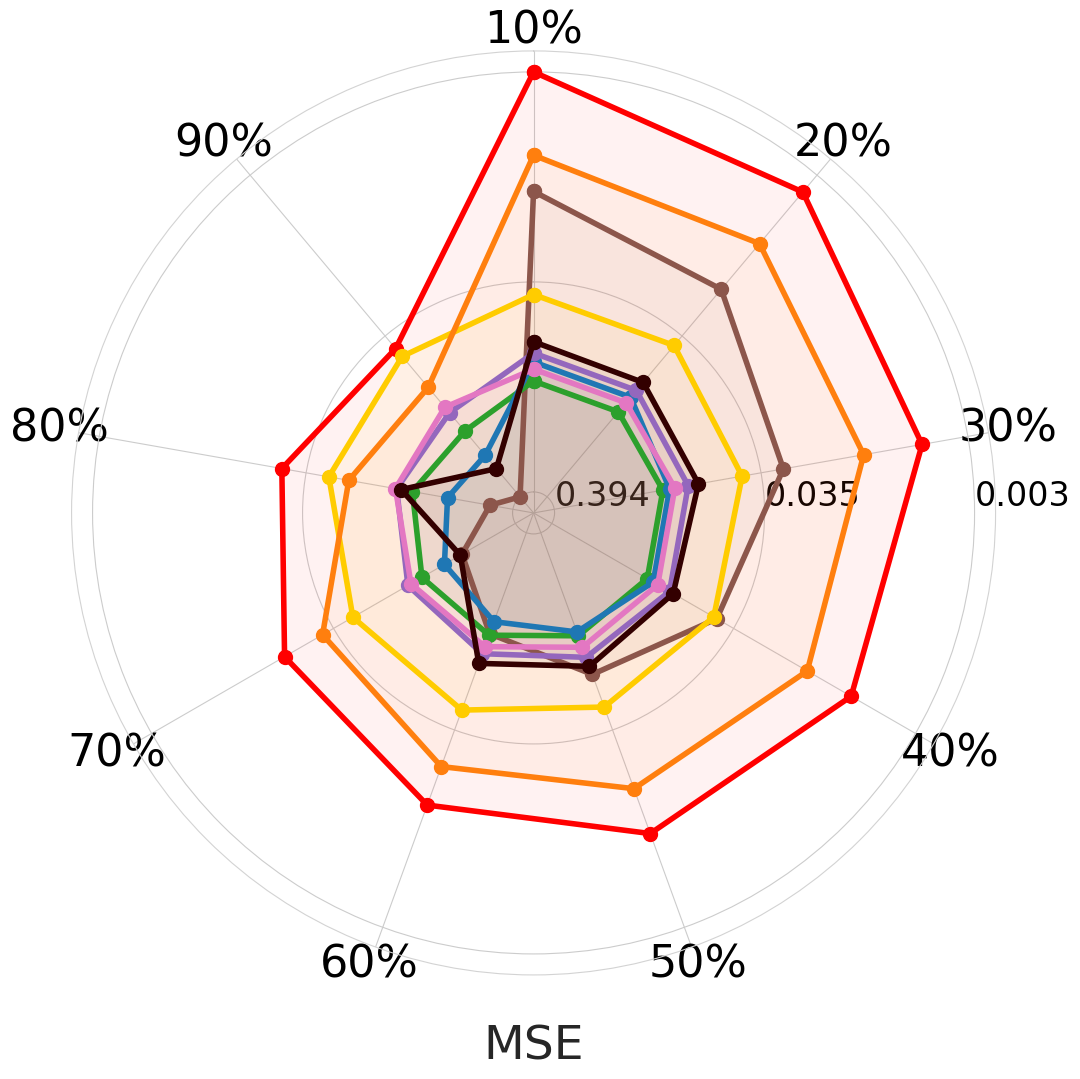

In [5]:
print(mse)
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()

MEXICO

In [6]:
mae, mse = load_results("MEXICO", ["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])

../log_bak_2/imputation/MEXICO/STIMP/20250426_221246_missing_0.1.log
../log_bak_2/imputation/MEXICO/STIMP/20250427_061159_missing_0.2.log
../log_bak_2/imputation/MEXICO/STIMP/20250427_141953_missing_0.3.log
../log_bak_2/imputation/MEXICO/STIMP/20250427_222946_missing_0.4.log
../log_bak_2/imputation/MEXICO/STIMP/20250428_064515_missing_0.5.log
../log_bak_2/imputation/MEXICO/STIMP/20250426_221401_missing_0.6.log
../log_bak_2/imputation/MEXICO/STIMP/20250427_063150_missing_0.7.log
../log_bak_2/imputation/MEXICO/STIMP/20250427_145125_missing_0.8.log
../log_bak_2/imputation/MEXICO/STIMP/20250427_231557_missing_0.9.log
../log_bak_2/imputation/MEXICO/DINEOF_per_timestep/20250430_201832_missing_0.1.log
../log_bak_2/imputation/MEXICO/DINEOF_per_timestep/20250430_205459_missing_0.2.log
../log_bak_2/imputation/MEXICO/DINEOF_per_timestep/20250430_213125_missing_0.3.log
../log_bak_2/imputation/MEXICO/DINEOF_per_timestep/20250430_220720_missing_0.4.log
../log_bak_2/imputation/MEXICO/DINEOF_per_times

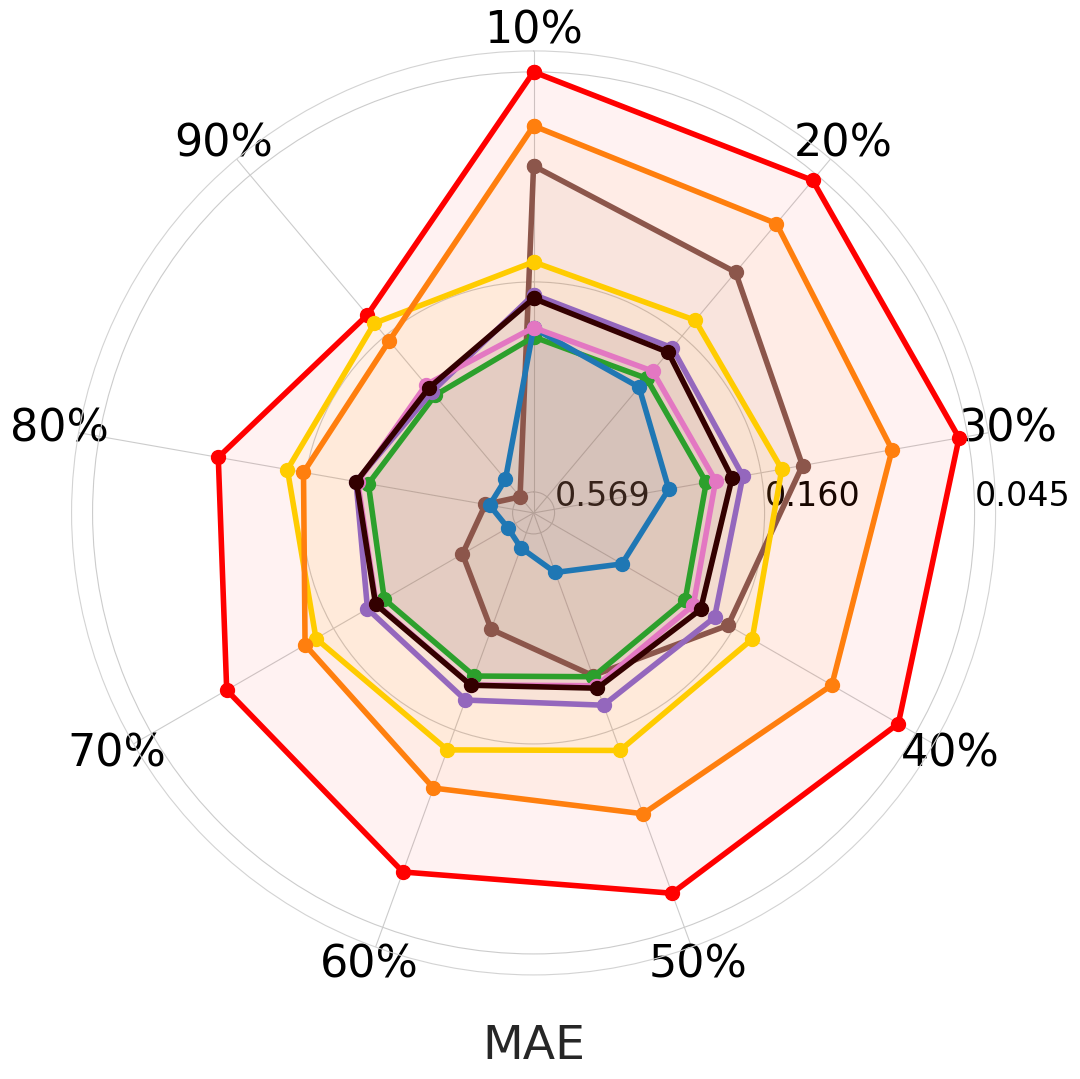

[0.43362832 0.51606218 0.61793215 0.69578313 0.75385973 0.79043877
 0.80752606 0.80640466 0.76255708]
[0.27858293 0.2891933  0.33753501 0.37189055 0.40064447 0.41765241
 0.42169595 0.34620787 0.06371191]


In [7]:
fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()
mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

[[0.0051 0.0054 0.0056 0.0064 0.0078 0.01   0.0135 0.0187 0.0337]
 [0.0203 0.0305 0.048  0.0775 0.1237 0.1896 0.2715 0.3626 0.4623]
 [0.0853 0.0855 0.0859 0.0863 0.087  0.0878 0.0889 0.0937 0.1136]
 [0.0373 0.0372 0.0372 0.0369 0.0368 0.0369 0.0374 0.0379 0.0388]
 [0.0698 0.0888 0.1218 0.1843 0.2858 0.3783 0.4066 0.3373 0.3454]
 [0.0561 0.058  0.0603 0.063  0.0664 0.071  0.0776 0.0889 0.115 ]
 [0.0099 0.0113 0.0136 0.0173 0.0229 0.0305 0.0405 0.0531 0.0522]
 [0.0765 0.0768 0.0771 0.0774 0.0779 0.0787 0.0801 0.0834 0.0976]
 [0.0557 0.0592 0.0647 0.0715 0.0738 0.0787 0.0804 0.0832 0.1062]]


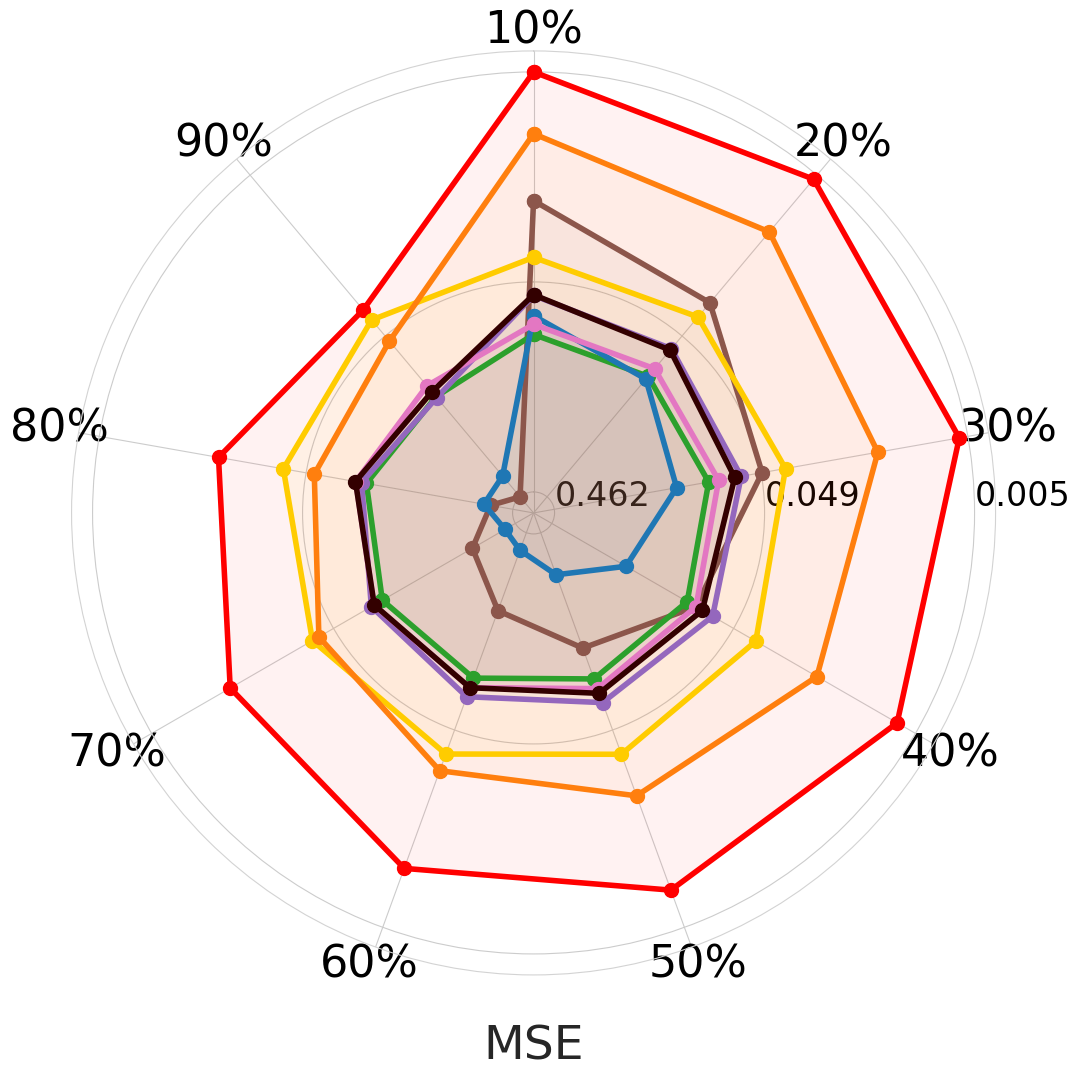

In [8]:
print(mse)
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()

Chesapeake

In [9]:
mae, mse = load_results("Chesapeake", ["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])

../log_bak_2/imputation/Chesapeake/STIMP/20250426_221232_missing_0.1.log
../log_bak_2/imputation/Chesapeake/STIMP/20250427_025156_missing_0.2.log
../log_bak_2/imputation/Chesapeake/STIMP/20250427_073706_missing_0.3.log
../log_bak_2/imputation/Chesapeake/STIMP/20250427_122548_missing_0.4.log
../log_bak_2/imputation/Chesapeake/STIMP/20250427_171955_missing_0.5.log
../log_bak_2/imputation/Chesapeake/STIMP/20250426_221320_missing_0.6.log
../log_bak_2/imputation/Chesapeake/STIMP/20250427_031324_missing_0.7.log
../log_bak_2/imputation/Chesapeake/STIMP/20250427_080852_missing_0.8.log
../log_bak_2/imputation/Chesapeake/STIMP/20250427_130215_missing_0.9.log
../log_bak_2/imputation/Chesapeake/DINEOF_per_timestep/20250430_202006_missing_0.1.log
../log_bak_2/imputation/Chesapeake/DINEOF_per_timestep/20250430_205011_missing_0.2.log
../log_bak_2/imputation/Chesapeake/DINEOF_per_timestep/20250430_211947_missing_0.3.log
../log_bak_2/imputation/Chesapeake/DINEOF_per_timestep/20250430_214903_missing_0.4

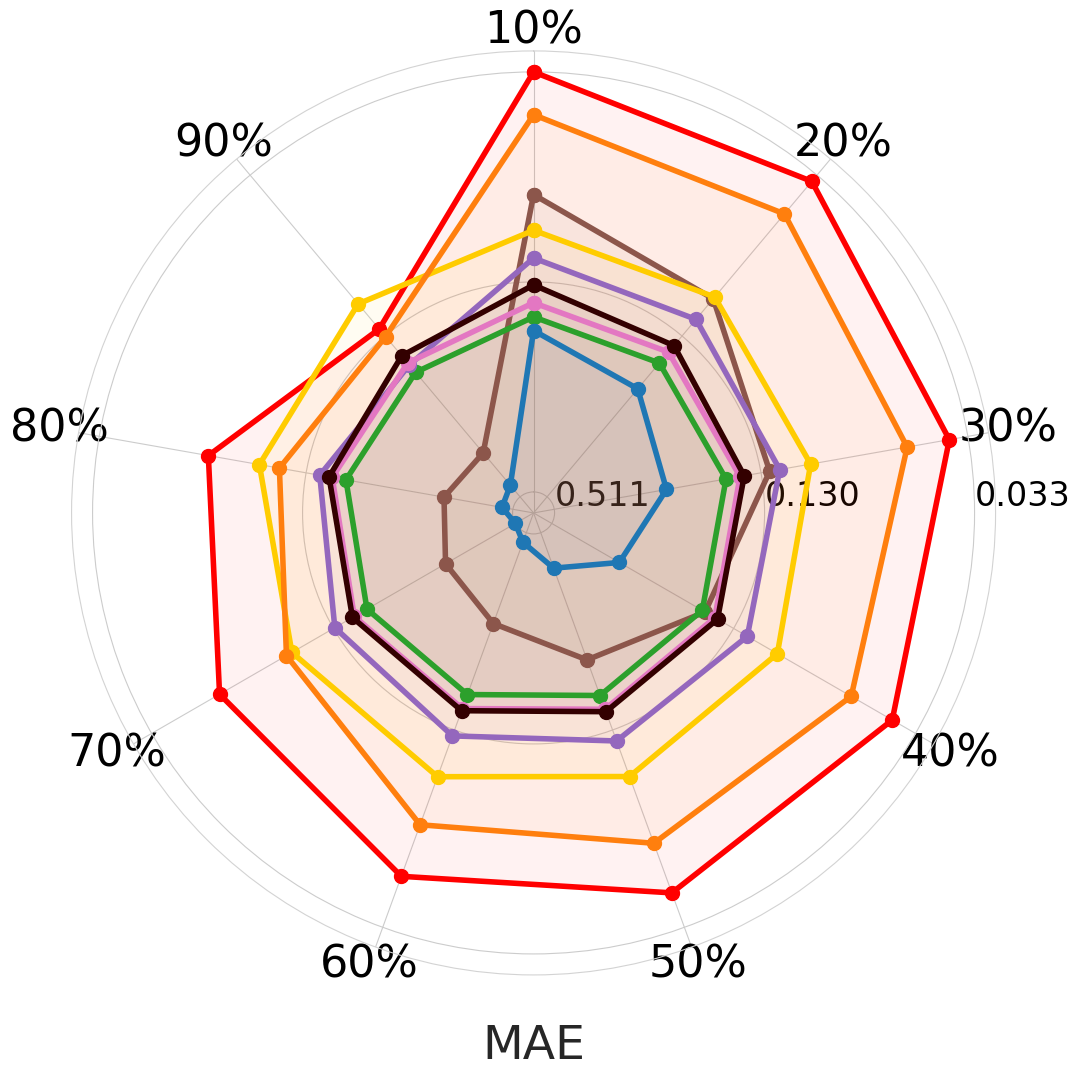

[0.55115962 0.63241525 0.69607843 0.75606721 0.80189573 0.82731959
 0.81797082 0.7903525  0.65223583]
[ 0.24367816  0.24235808  0.24390244  0.2659176   0.29152542  0.30104322
  0.3960396   0.28706625 -0.23833671]


In [10]:
fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()
mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

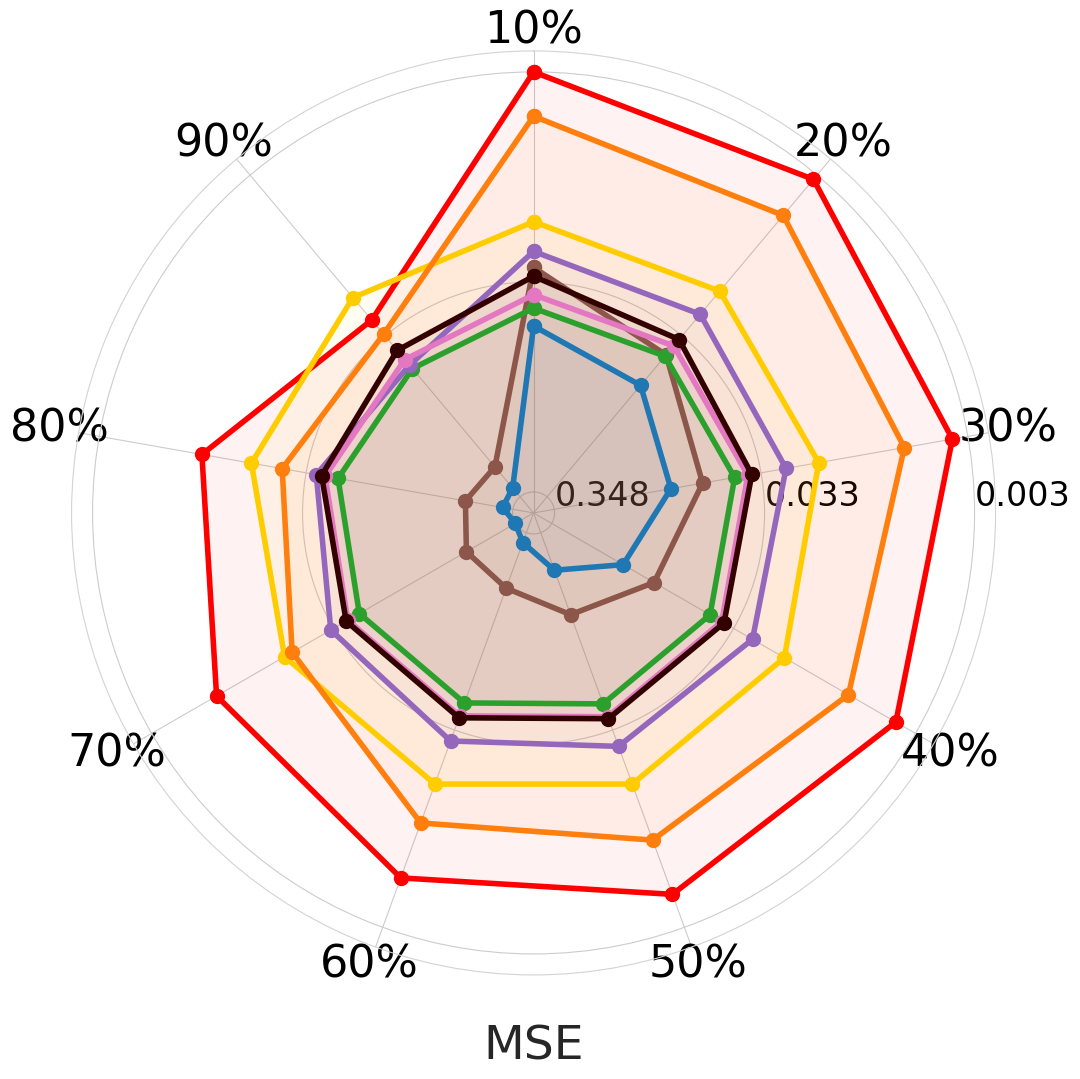

In [11]:
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()

Yangtze

In [12]:
mae, mse = load_results("Yangtze", ["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])

../log_bak_2/imputation/Yangtze/STIMP/20250426_221425_missing_0.1.log
../log_bak_2/imputation/Yangtze/STIMP/20250427_135658_missing_0.2.log
../log_bak_2/imputation/Yangtze/STIMP/20250428_054327_missing_0.3.log
../log_bak_2/imputation/Yangtze/STIMP/20250428_213321_missing_0.4.log
../log_bak_2/imputation/Yangtze/STIMP/20250429_131635_missing_0.5.log
../log_bak_2/imputation/Yangtze/STIMP/20250426_221838_missing_0.6.log
../log_bak_2/imputation/Yangtze/STIMP/20250427_142434_missing_0.7.log
../log_bak_2/imputation/Yangtze/STIMP/20250428_061836_missing_0.8.log
../log_bak_2/imputation/Yangtze/STIMP/20250428_220102_missing_0.9.log
../log_bak_2/imputation/Yangtze/DINEOF_per_timestep/20250429_000955_missing_0.1.log
../log_bak_2/imputation/Yangtze/DINEOF_per_timestep/20250429_014156_missing_0.2.log
../log_bak_2/imputation/Yangtze/DINEOF_per_timestep/20250429_031103_missing_0.3.log
../log_bak_2/imputation/Yangtze/DINEOF_per_timestep/20250429_043814_missing_0.4.log
../log_bak_2/imputation/Yangtze/DI

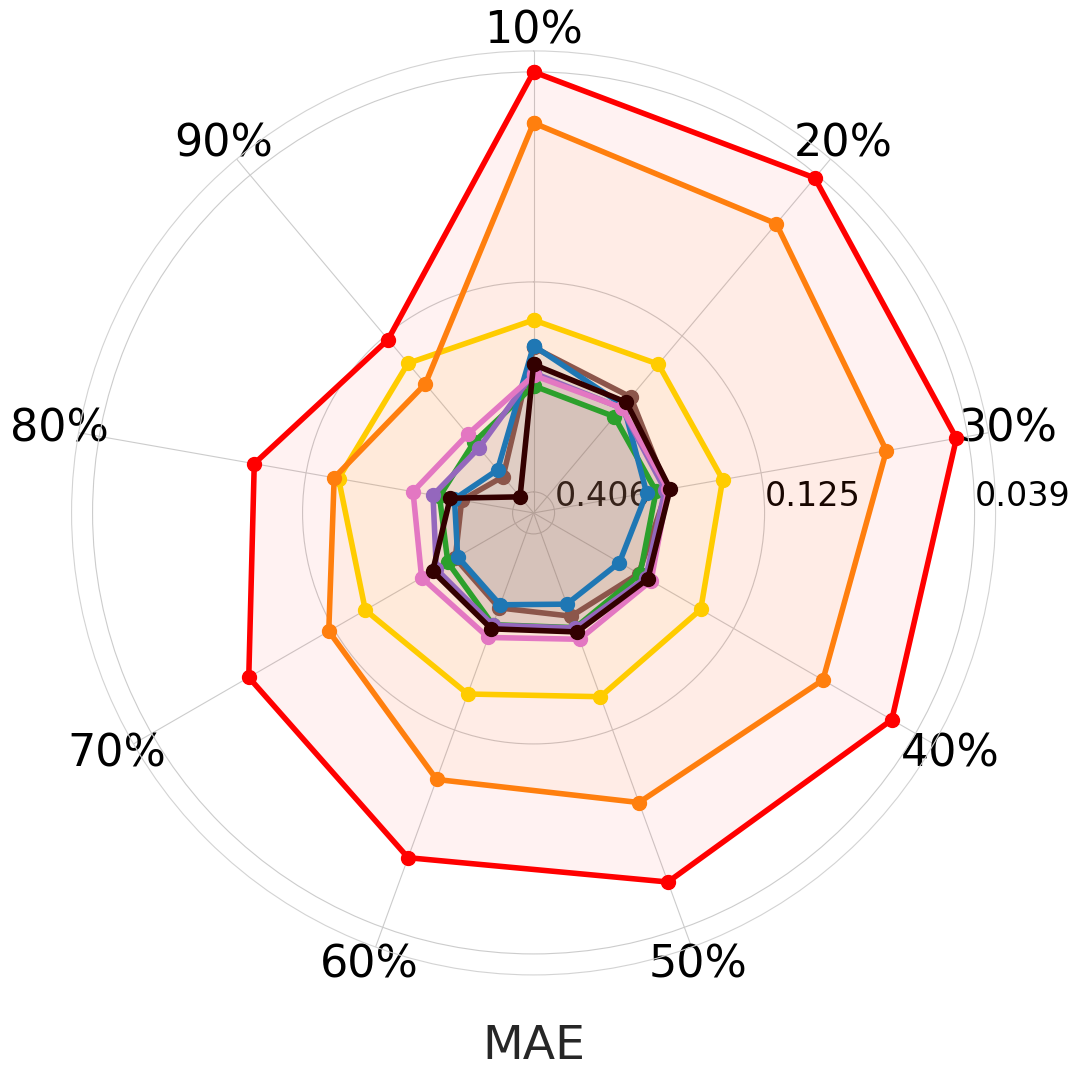

[0.78595133 0.79846939 0.80664794 0.8052677  0.79473684 0.7742681
 0.73684211 0.69245966 0.63281027]
[0.24854369 0.28442029 0.32845528 0.359375   0.37714988 0.37259101
 0.40378289 0.36505778 0.15937296]


In [13]:
fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()
mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

[[0.0039 0.0042 0.0046 0.0054 0.0067 0.009  0.013  0.0202 0.0345]
 [0.0732 0.0859 0.1009 0.1163 0.1286 0.1367 0.1452 0.162  0.1936]
 [0.0978 0.0991 0.1    0.1012 0.1019 0.1043 0.1226 0.1299 0.1418]
 [0.0494 0.0487 0.0495 0.0496 0.0478 0.0495 0.048  0.0461 0.047 ]
 [0.0494 0.0677 0.0903 0.1069 0.1071 0.1041 0.1162 0.1268 0.164 ]
 [0.0895 0.0923 0.0955 0.0993 0.1029 0.1095 0.1172 0.129  0.1505]
 [0.0076 0.0089 0.0112 0.0148 0.0175 0.0215 0.0378 0.0506 0.0666]
 [0.0863 0.0866 0.087  0.0877 0.0886 0.0901 0.0929 0.0992 0.1217]
 [0.097  0.0752 0.079  0.0802 0.0891 0.0912 0.1158 0.1398 0.2335]]


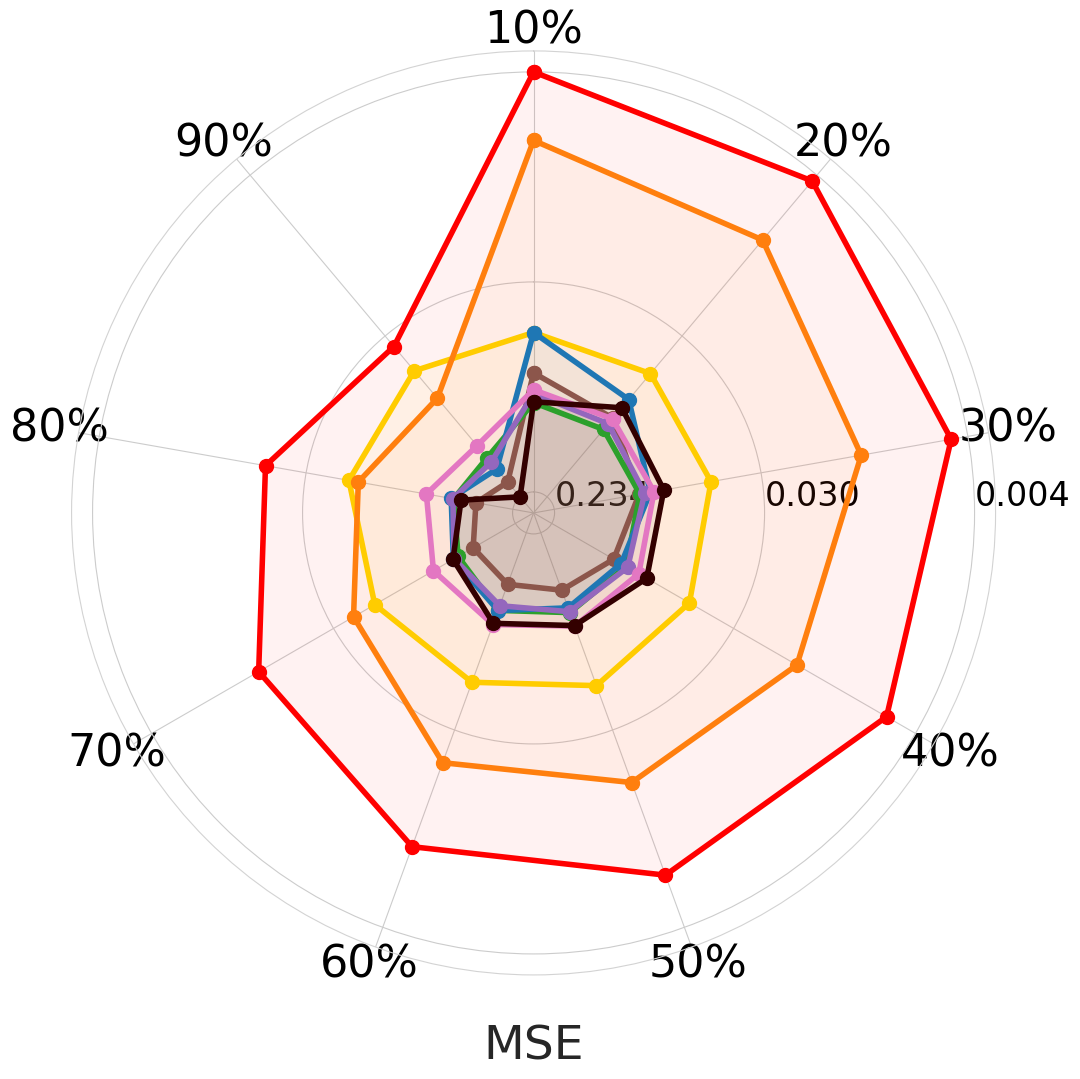

In [14]:
print(mse)
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()